# UCK 358E – Introduction to Artificial Intelligence 
## Homework 2
## Deadline: May 12, 2024




#### Name: Nisa Nur ELMAS
#### Student Number: 110210031

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## import any library that you will use


# Load Data (don't change anything in this part, just run it) 

In [43]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [44]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [45]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [46]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [47]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
filter_col.extend(["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points"])
df2 = df.loc[(df['Cover_Type'] == 1) | (df['Cover_Type'] == 3) ]
X2 = df2[filter_col]
y2 = df2[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [48]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
2701,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2047,89,228,42
2056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3341,184,424,1809
7093,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2651,217,470,1124
5778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3114,180,474,3206
10341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3164,226,150,1262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12092,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2081,244,175,488
1799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3241,217,0,2012
11119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2510,228,319,180
13509,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2401,146,210,569


In [49]:
y_train2

,Cover_Type
2701,3
2056,1
7093,3
5778,1
10341,1
...,...
12092,3
1799,1
11119,3
13509,3


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2) for training and (X_test2, y_test2) for testing your model. X_train2 contains both continues and categorical features. </font>

## Part a) Train SVM model with the first training set (X_train). Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use sklearn in this part) 

C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6823192239858906


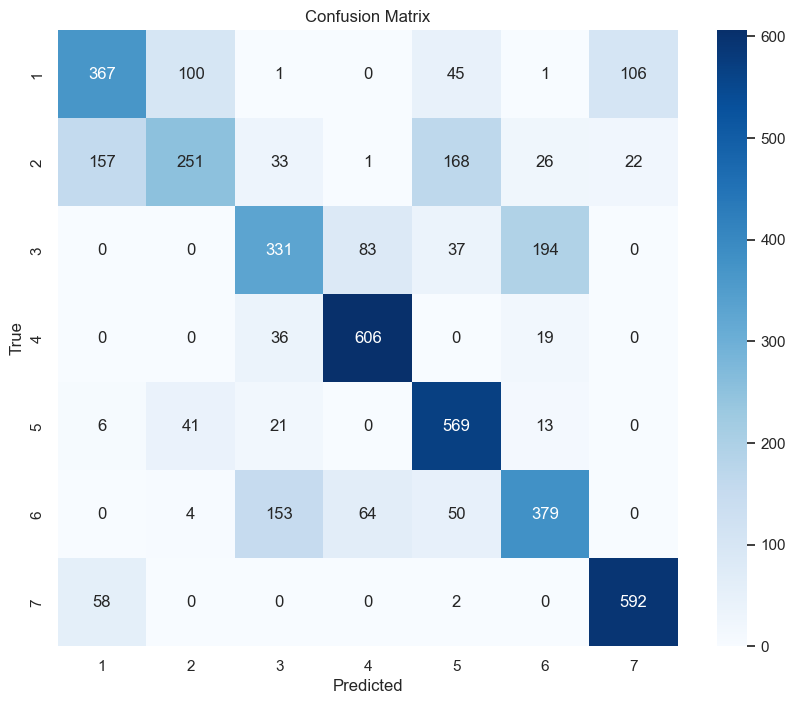

In [50]:
# Scaling using Standart Scaler for preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tried kernel='sigmoid' -> 0.36 accuracy, 'poly' -> 0.63 accuracy 
# Tried C=1.0 -> 0.68 accuracy
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Ploting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Tried to increase accuracy value by changing model complexity, changed C=1.0 to C=10.0
svm_model_complex = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
svm_model_complex.fit(X_train_scaled, y_train)

test_accuracy_complex = svm_model_complex.score(X_test_scaled, y_test)
print("Accuracy for Complex Model:", test_accuracy_complex)

#I also tried hyperparameter tuning with GridSearch but it took so much tome to run and it did not finish compiling.

C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Complex Model: 0.6997354497354498


## Part b) Train NN models with the first training set (X_train). You will train NN models with different architectures. 

### b1) Train a NN model with a small network and train another one using a bigger network that contains at least 3 hidden layers. Try to figure out whether there is overfitting or underfitting. Define the required preprocesses and feature engineering approaches to obtain the best accuracy with the second model for the test set (X_test). Plot confusion matrix, present your results and discuss your findings. (You are free to use keras in part b1, don't use sklearn for NN training) 


In [52]:
# Using label encoder to convert cathegorical values to numerical values
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Defining small neural network
small_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(7, activation='softmax')
])

# Compiling the model
small_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
small_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=64, validation_split=0.2)

# Evaluating small model
small_model_accuracy = small_model.evaluate(X_test_scaled, y_test_encoded)[1]
print("Accuracy of small model:", small_model_accuracy)

Epoch 1/50


C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


133/133 [==============================] - 0s 1ms/step - loss: 1.7044 - accuracy: 0.3041 - val_loss: 1.4465 - val_accuracy: 0.4152
Epoch 2/50
133/133 [==============================] - 0s 632us/step - loss: 1.2504 - accuracy: 0.4933 - val_loss: 1.1247 - val_accuracy: 0.5272
Epoch 3/50
133/133 [==============================] - 0s 617us/step - loss: 1.0396 - accuracy: 0.5596 - val_loss: 0.9868 - val_accuracy: 0.5848
Epoch 4/50
133/133 [==============================] - 0s 612us/step - loss: 0.9427 - accuracy: 0.6001 - val_loss: 0.9218 - val_accuracy: 0.6089
Epoch 5/50
133/133 [==============================] - 0s 617us/step - loss: 0.8924 - accuracy: 0.6212 - val_loss: 0.8858 - val_accuracy: 0.6249
Epoch 6/50
133/133 [==============================] - 0s 624us/step - loss: 0.8630 - accuracy: 0.6348 - val_loss: 0.8616 - val_accuracy: 0.6372
Epoch 7/50
133/133 [==============================] - 0s 609us/step - loss: 0.8429 - accuracy: 0.6465 - val_loss: 0.8492 - val_accuracy: 0.6438
Epoch

In [53]:
# Defining larger neural network
larger_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(7, activation='softmax')
])

# Compiling the model
larger_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
larger_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=64, validation_split=0.2)# Evaluate larger model

# Evaluating large model
larger_model_accuracy = larger_model.evaluate(X_test_scaled, y_test_encoded)[1]
print("Accuracy of larger model on test set:", larger_model_accuracy)

Epoch 1/50
133/133 [==============================] - 0s 1ms/step - loss: 1.3504 - accuracy: 0.4678 - val_loss: 0.9610 - val_accuracy: 0.5824
Epoch 2/50
133/133 [==============================] - 0s 752us/step - loss: 0.9013 - accuracy: 0.6092 - val_loss: 0.8536 - val_accuracy: 0.6320
Epoch 3/50
133/133 [==============================] - 0s 767us/step - loss: 0.8393 - accuracy: 0.6373 - val_loss: 0.8253 - val_accuracy: 0.6486
Epoch 4/50
133/133 [==============================] - 0s 759us/step - loss: 0.8107 - accuracy: 0.6560 - val_loss: 0.8194 - val_accuracy: 0.6556
Epoch 5/50
133/133 [==============================] - 0s 752us/step - loss: 0.7902 - accuracy: 0.6645 - val_loss: 0.8061 - val_accuracy: 0.6552
Epoch 6/50
133/133 [==============================] - 0s 767us/step - loss: 0.7809 - accuracy: 0.6652 - val_loss: 0.8049 - val_accuracy: 0.6542
Epoch 7/50
133/133 [==============================] - 0s 764us/step - loss: 0.7696 - accuracy: 0.6715 - val_loss: 0.7916 - val_accuracy: 0

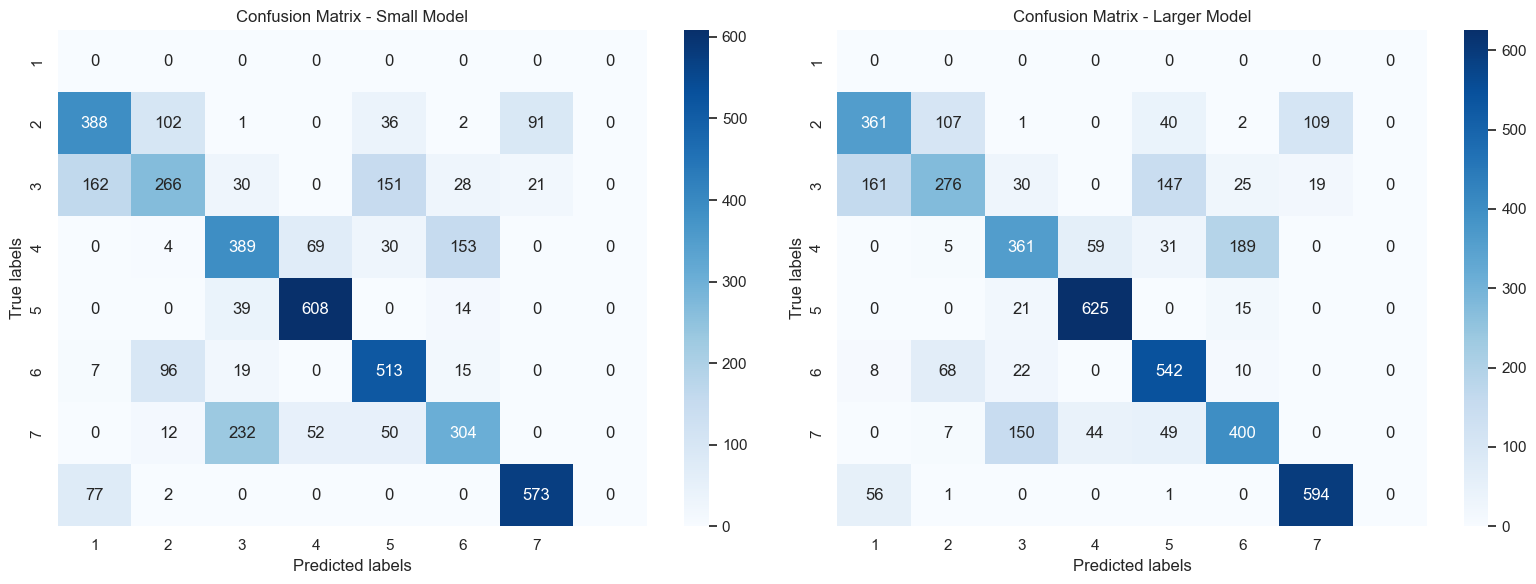

In [54]:
y_pred_small = np.argmax(small_model.predict(X_test_scaled), axis=1)
y_pred_larger = np.argmax(larger_model.predict(X_test_scaled), axis=1)

# Decoding onehot encoded labels back to categorical labels
y_test_decoded = label_encoder.inverse_transform(np.argmax(y_test_encoded, axis=1))

conf_matrix_small = confusion_matrix(y_test_decoded, y_pred_small)
conf_matrix_larger = confusion_matrix(y_test_decoded, y_pred_larger)

# Plotting confusion matricies
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(conf_matrix_small, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('Confusion Matrix - Small Model')

sns.heatmap(conf_matrix_larger, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')
axes[1].set_title('Confusion Matrix - Larger Model')

plt.tight_layout()
plt.show()

### b2) Use the second architecture (which contains at least 3 hidden layers) and the preprocess that you defined in part b1, and train this neural network by developing your NN training algorithm from scratch without using any library. Compare your results with b1. (You can benefit from the codes available in ninova)


## Part c) This time, you have a different dataset with continues and categorical features (X_train2) to train unsupervised learning models. You need to train autoencoder and K-means, EM models. 

### c1) Train an autoencoder with 2 neurons in the latent space and more that 2 layers in the encoder/decoder, train another autoencoder with same architecture except there is 3 neurons in the latent space. Evaluate the performance of your models, and try to improve it. (You are free to use keras in part c1, don't use sklearn for NN training.) 


In [55]:
# Also scaling X_train2 and X_test2 datasets
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Defining the autoencoder
def build_autoencoder(input_dim, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    encoder = Dense(64, activation='relu')(inputs)
    encoder = Dense(32, activation='relu')(encoder)
    encoder_output = Dense(latent_dim, activation='relu')(encoder)

    # Decoder
    decoder = Dense(32, activation='relu')(encoder_output)
    decoder = Dense(64, activation='relu')(decoder)
    decoder_output = Dense(input_dim, activation='sigmoid')(decoder)

    # Aautoencoder model
    autoencoder = Model(inputs, decoder_output)
    return autoencoder

# Defining the dimensions
input_dim = X_train2_scaled.shape[1]
latent_dim_2 = 2
latent_dim_3 = 3

# Building autoencoders
autoencoder_2 = build_autoencoder(input_dim, latent_dim_2)
autoencoder_3 = build_autoencoder(input_dim, latent_dim_3)

# Compiling and training models
autoencoder_2.compile(optimizer='adam', loss='mse')
autoencoder_3.compile(optimizer='adam', loss='mse')

autoencoder_2.fit(X_train2_scaled, X_train2_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)
autoencoder_3.fit(X_train2_scaled, X_train2_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Evaluating models
loss_2 = autoencoder_2.evaluate(X_test2_scaled, X_test2_scaled)
loss_3 = autoencoder_3.evaluate(X_test2_scaled, X_test2_scaled)

Epoch 1/50
76/76 [==============================] - 0s 2ms/step - loss: 0.9023 - val_loss: 0.8218
Epoch 2/50
76/76 [==============================] - 0s 763us/step - loss: 0.7724 - val_loss: 0.8065
Epoch 3/50
76/76 [==============================] - 0s 750us/step - loss: 0.7553 - val_loss: 0.7909
Epoch 4/50
76/76 [==============================] - 0s 789us/step - loss: 0.7421 - val_loss: 0.7818
Epoch 5/50
76/76 [==============================] - 0s 776us/step - loss: 0.7304 - val_loss: 0.7695
Epoch 6/50
76/76 [==============================] - 0s 750us/step - loss: 0.7207 - val_loss: 0.7626
Epoch 7/50
76/76 [==============================] - 0s 737us/step - loss: 0.7163 - val_loss: 0.7603
Epoch 8/50
76/76 [==============================] - 0s 763us/step - loss: 0.7135 - val_loss: 0.7567
Epoch 9/50
76/76 [==============================] - 0s 737us/step - loss: 0.7098 - val_loss: 0.7544
Epoch 10/50
76/76 [==============================] - 0s 750us/step - loss: 0.7071 - val_loss: 0.7516
E

In [56]:
# Calculating loss
print("Autoencoder with 2 latent dimensions loss:", loss_2)
print("Autoencoder with 3 latent dimensions loss:", loss_3)

def calculate_mse(original_data, reconstructed_data):
    mse = np.mean(np.square(original_data - reconstructed_data))
    return mse

# Calculating MSE
latent_2 = autoencoder_2.predict(X_train2_scaled)
latent_3 = autoencoder_3.predict(X_train2_scaled)

mse_autoencoder_2 = calculate_mse(X_train2_scaled, latent_2)
mse_autoencoder_3 = calculate_mse(X_train2_scaled, latent_3)

print("Autoencoder with 2 latent dimensions Mean Squared Error (MSE):", mse_autoencoder_2)
print("Autoencoder with 3 latent dimensions Mean Squared Error (MSE):", mse_autoencoder_3)

Autoencoder with 2 latent dimensions loss: 0.6389764547348022
Autoencoder with 3 latent dimensions loss: 0.6385717391967773
Autoencoder with 2 latent dimensions Mean Squared Error (MSE): 0.703264093753141
Autoencoder with 3 latent dimensions Mean Squared Error (MSE): 0.7001829109575765


### c2) You will train separate models using the latent spaces in the first autoencoder and second autoencoder in part c1. Only use the neuron outputs in the latent space as your features, and implement K-means and EM algorithms to cluster the data. Evaluate the performance of trained clustering models by using test set labels in X_test2. Plot 2-dimensional and 3-dimensional figures for the latent layer outputs while assessing model performances, and extend your discussions based on these figures and true classes of the samples. In your figures, illustrate the true classes of the samples using different colours. (You are free to use sklearn in this part) 

C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elmas\anaconda3\envs\tfenvi\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a

K-means score (2D latent space): -902.0657958984375
K-means score (3D latent space): -1056.7923583984375
EM score (2D latent space): 219.31545332576073
EM score (3D latent space): 217.39720783743462


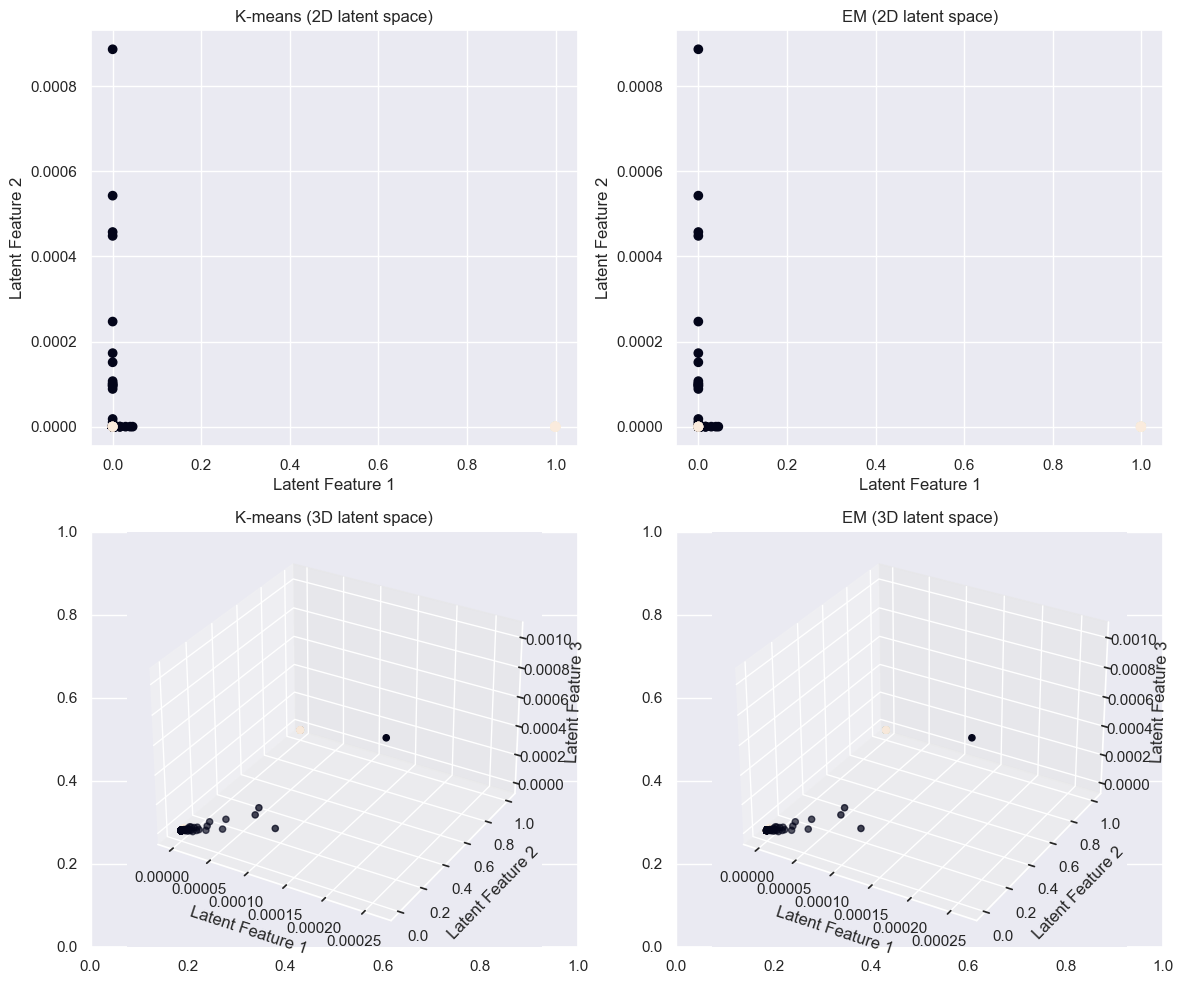

In [57]:
# Extract latent space representations
latent_representation_2 = autoencoder_2.predict(X_test2_scaled)
latent_representation_3 = autoencoder_3.predict(X_test2_scaled)

# Defining the number of clusters
n_clusters = len(np.unique(y_test2))

# K-means and EM models
kmeans_2 = KMeans(n_clusters=n_clusters)
kmeans_3 = KMeans(n_clusters=n_clusters)
em_2 = GaussianMixture(n_components=n_clusters)
em_3 = GaussianMixture(n_components=n_clusters)

# Fitting K-means and EM models
kmeans_2.fit(latent_representation_2)
kmeans_3.fit(latent_representation_3)
em_2.fit(latent_representation_2)
em_3.fit(latent_representation_3)

# Evaluating the performance of the models
kmeans_score_2 = kmeans_2.score(latent_representation_2)
kmeans_score_3 = kmeans_3.score(latent_representation_3)
em_score_2 = em_2.score(latent_representation_2)
em_score_3 = em_3.score(latent_representation_3)

print("K-means score (2D latent space):", kmeans_score_2)
print("K-means score (3D latent space):", kmeans_score_3)
print("EM score (2D latent space):", em_score_2)
print("EM score (3D latent space):", em_score_3)

# Extracting values from y_test2 for coloring
color_values = y_test2.values.ravel()

# Visualize latent space representations in 2D and 3D
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Ploting for K-means with 2D latent space
axes[0, 0].scatter(latent_representation_2[:, 0], latent_representation_2[:, 1], c=color_values)
axes[0, 0].set_title('K-means (2D latent space)')
axes[0, 0].set_xlabel('Latent Feature 1')
axes[0, 0].set_ylabel('Latent Feature 2')

# Ploting for EM with 2D latent space
axes[0, 1].scatter(latent_representation_2[:, 0], latent_representation_2[:, 1], c=color_values)
axes[0, 1].set_title('EM (2D latent space)')
axes[0, 1].set_xlabel('Latent Feature 1')
axes[0, 1].set_ylabel('Latent Feature 2')

# Ploting for K-means with 3D latent space
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(latent_representation_3[:, 0], latent_representation_3[:, 1], latent_representation_3[:, 2], c=color_values)
ax.set_title('K-means (3D latent space)')
ax.set_xlabel('Latent Feature 1')
ax.set_ylabel('Latent Feature 2')
ax.set_zlabel('Latent Feature 3')

# Ploting for EM with 3D latent space
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(latent_representation_3[:, 0], latent_representation_3[:, 1], latent_representation_3[:, 2], c=color_values)
ax.set_title('EM (3D latent space)')
ax.set_xlabel('Latent Feature 1')
ax.set_ylabel('Latent Feature 2')
ax.set_zlabel('Latent Feature 3')

plt.tight_layout()
plt.show()
